<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Rendering-Text-and-Formulas">Rendering Text and Formulas</a></li>
<ol><li><a class="" href="#Text">Text</a></li>
<ol><li><a class="" href="#Text">Text</a></li>
<ol><li><a class="" href="#Fonts">Fonts</a></li>
<li><a class="" href="#Colors">Colors</a></li>
<li><a class="" href="#Setting-Line-Spacing">Setting Line Spacing</a></li>
<li><a class="" href="#Iterating-Text">Iterating Text</a></li>
</ol><li><a class="" href="#MarkupText">MarkupText</a></li>
<li><a class="" href="#Paragraph">Paragraph</a></li>
<li><a class="" href="#The-Write-animation">The Write animation</a></li>
</ol><li><a class="" href="#LaTeX">LaTeX</a></li>
<ol><li><a class="" href="#MathTex">MathTex</a></li>
<ol><li><a class="" href="#Keywords-Arguments">Keywords Arguments</a></li>
</ol><li><a class="" href="#Extra-LaTeX-Packages">Extra LaTeX Packages</a></li>
<li><a class="" href="#Substrings-and-parts">Substrings and parts</a></li>
<ol><li><a class="" href="#Using-index_labels">Using index_labels</a></li>
</ol>

# Imports

In [1]:
from manim import *
config.media_embed = True

Manim Community v0.17.2

In [2]:
#ignore this cell, only for setup
param= "-v WARNING  --progress_bar None  -r 500,300  --disable_caching Example"
param_fig = "-v WARNING -r 500,300 -s  --disable_caching Example"

param_progress = "-v WARNING -r  500,300  --disable_caching Example"

NO  = Cross(Square(), stroke_color = RED_D, stroke_width = 38).scale(0.9).to_edge(LEFT, buff=1)
YES = SVGMobject("tick.svg").to_edge(LEFT, buff=1)
BEST = YES.copy()
BEST.add(Star(color= YELLOW, fill_opacity=1).scale(0.5).move_to(BEST).shift(0.5*DOWN+0.5*RIGHT));

[Reference 1](https://docs.manim.community/en/stable/guides/using_text.html)

[Reference 2](https://docs.manim.community/en/stable/reference/manim.mobject.text.text_mobject.Paragraph.html#manim.mobject.text.text_mobject.Paragraph)

[Reference 3](https://docs.manim.community/en/stable/reference/manim.mobject.text.text_mobject.html#module-manim.mobject.text.text_mobject)

# Rendering Text and Formulas

There are two different ways by which you can render Text in videos:

1. Using Pango (`text_mobject`)
2. Using LaTeX (`tex_mobject`)

## Text

If you want to render simple text, you should use either `Text` or `MarkupText`, or one of its derivatives like `Paragraph`.

### `Text`

The simplest way to add text to your animations is to use the `Text` class. It uses the Pango library to render text. With Pango, you can also render non-English alphabets like 你好 or こんにちは or 안녕하세요 or مرحبا بالعالم.

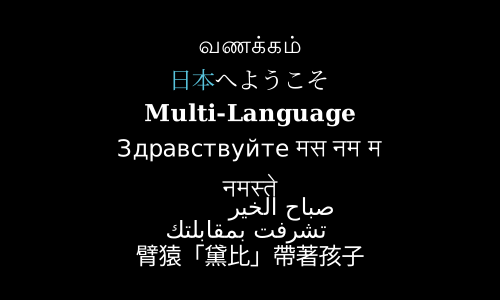

In [29]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        morning = Text("வணக்கம்", font="sans-serif")
        japanese = Text(
            "日本へようこそ", t2c={"日本": BLUE}
        )  # works same as ``Text``.
        mess = Text("Multi-Language", weight=BOLD)
        russ = Text("Здравствуйте मस नम म ", font="sans-serif")
        hin = Text("नमस्ते", font="sans-serif")
        arb = Text(
            "صباح الخير \n تشرفت بمقابلتك", font="sans-serif"
        )  # don't mix RTL and LTR languages nothing shows up then ;-)
        chinese = Text("臂猿「黛比」帶著孩子", font="sans-serif")
        self.add(morning, japanese, mess, russ, hin, arb, chinese)
        for i,mobj in enumerate(self.mobjects):
            mobj.shift(DOWN*(i-3))

#### Fonts

`manim` uses the `Pango` library to render text. `Pango` can use any font installed on your system. Let's see a list of fonts available on the system:

In [5]:
import manimpango
manimpango.list_fonts()

['Abyssinica SIL',
 'Andale Mono',
 'Ani',
 'AnjaliOldLipi',
 'Arial',
 'Arial Black',
 'C059',
 'Chandas',
 'Chilanka',
 'Comic Sans MS',
 'Courier New',
 'D050000L',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'Dhurjati',
 'Droid Sans Fallback',
 'Dyuthi',
 'FreeMono',
 'FreeSans',
 'FreeSerif',
 'GFS Baskerville',
 'GFS Porson',
 'Gargi',
 'Garuda',
 'Gayathri',
 'Georgia',
 'Gidugu',
 'Gubbi',
 'Gurajada',
 'Impact',
 'Jamrul',
 'KacstArt',
 'KacstBook',
 'KacstDecorative',
 'KacstDigital',
 'KacstFarsi',
 'KacstLetter',
 'KacstNaskh',
 'KacstOffice',
 'KacstOne',
 'KacstPen',
 'KacstPoster',
 'KacstQurn',
 'KacstScreen',
 'KacstTitle',
 'KacstTitleL',
 'Kalapi',
 'Kalimati',
 'Karumbi',
 'Keraleeyam',
 'Khmer OS',
 'Khmer OS System',
 'Kinnari',
 'LKLUG',
 'LakkiReddy',
 'Laksaman',
 'Latin Modern Math',
 'Latin Modern Mono',
 'Latin Modern Mono Caps',
 'Latin Modern Mono Light',
 'Latin Modern Mono Light Cond',
 'Latin Modern Mono Prop',
 'Latin Modern Mono Prop Light'

We can use font by specifying the `font` parameter:

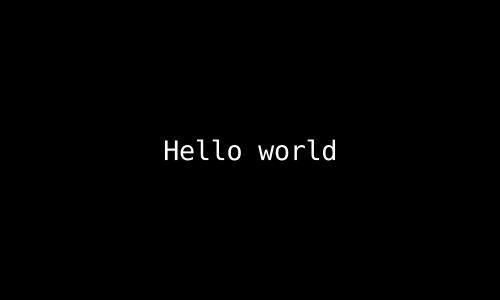

In [6]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        text = Text("Hello world", font = "Consolas", font_size=55)
        self.add(text)

Slant is the style of the Text, and it can be `NORMAL` (the default), `ITALIC` or `OBLIQUE`. Usually, for many fonts both `ITALIC` and `OBLIQUE` look similar, but `ITALIC` uses Roman Style, whereas `OBLIQUE` uses Italic Style.

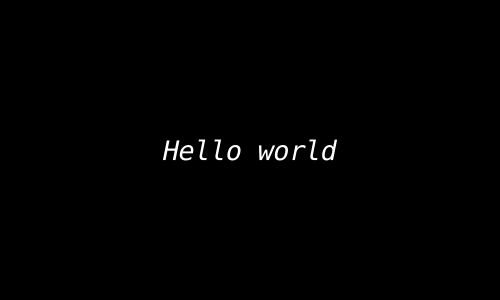

In [7]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        text = Text("Hello world", font = "Consolas", font_size=55, slant=ITALIC)
        self.add(text)

Weights can also be used to specify the boldness of the `Text`. `manimpango` supports a number of weights. Let's see some examples:

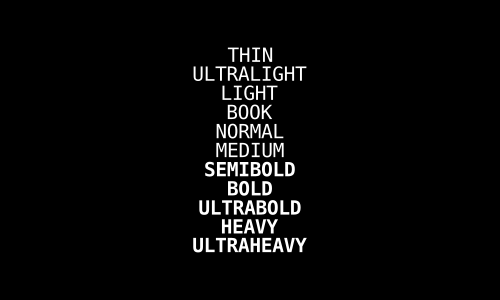

In [12]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        import manimpango

        g = VGroup()
        weight_list = dict(
            sorted(
                {
                    weight: manimpango.Weight(weight).value
                    for weight in manimpango.Weight
                }.items(),
                key=lambda x: x[1],
            )
        )
        for weight in weight_list:
            g += Text(weight.name, weight=weight.name, font="Consolas", font_size=80)
        self.add(g.arrange(DOWN).scale(0.5))

#### Colors

You can set the color of the text using `color`:

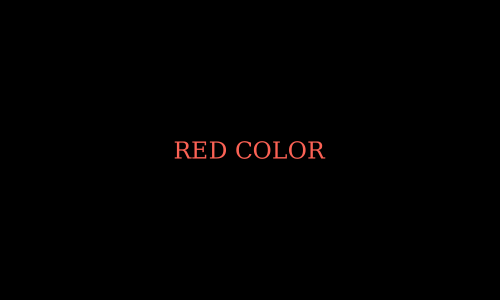

In [13]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        col = Text("RED COLOR", color=RED)
        self.add(col)

You can use utilities like `t2c` for coloring specific characters. `t2c` accepts two types of dictionaries,

<ul class="simple">
<li><p>The keys can contain indices like <code class=""><span class="pre">[2:-1]</span></code> or <code class=""><span class="pre">[4:8]</span></code>,
this works similar to how slicing
works in Python. The values should be the color of the Text from <code class="xref py py-class "><span class="pre">Color</span></code>.</p></li>
<li><p>The keys contain words or characters which should be colored separately
and the values should be the color from <code class="xref py py-class "><span class="pre">Color</span></code>:</p></li>
</ul>

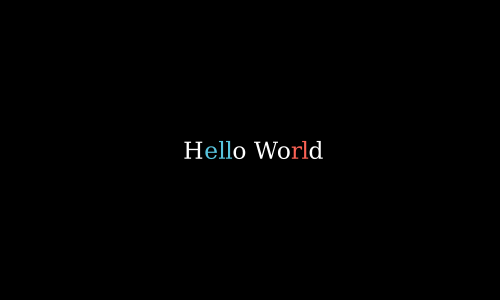

In [14]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        t2cindices = Text('Hello', t2c={'[1:-1]': BLUE}).move_to(LEFT)
        t2cwords = Text('World',t2c={'rl':RED}).next_to(t2cindices, RIGHT)
        self.add(t2cindices, t2cwords)

You can add a gradient using `gradient`. The value must be an iterable of any length:

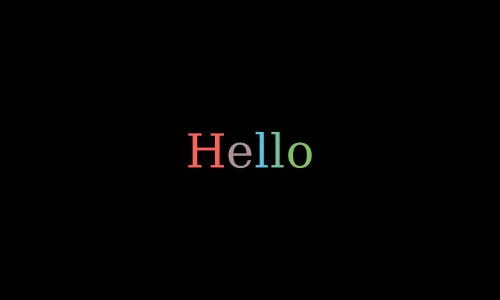

In [15]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        t = Text("Hello", gradient=(RED, BLUE, GREEN), font_size=96)
        self.add(t)

You can also use `t2g` for gradients with specific characters of the text. It shares a similar syntax to the interface for colors:

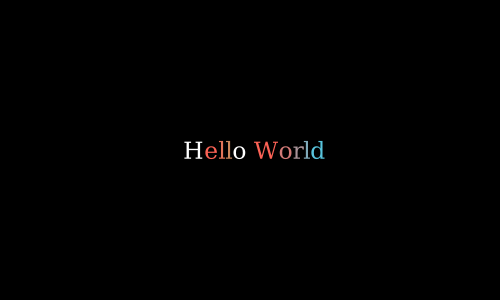

In [16]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        t2gindices = Text(
            'Hello',
            t2g={
                '[1:-1]': (RED,GREEN),
            },
        ).move_to(LEFT)
        t2gwords = Text(
            'World',
            t2g={
                'World':(RED,BLUE),
            },
        ).next_to(t2gindices, RIGHT)
        self.add(t2gindices, t2gwords)

#### Setting Line Spacing


You can set the line spacing using `line_spacing`:

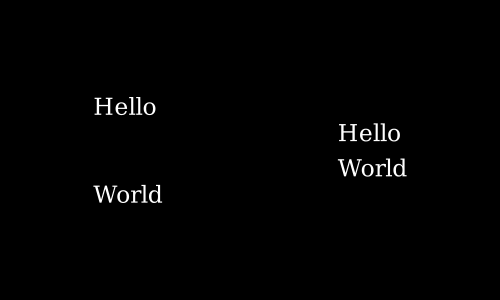

In [17]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        a = Text("Hello\nWorld", line_spacing=1)
        b = Text("Hello\nWorld", line_spacing=4)
        self.add(Group(a,b).arrange(LEFT, buff=5))

#### Iterating `Text`

Text objects behave like `VGroups`. Therefore, you can slice and index the text. For example, you can set each letter to different color by iterating it.

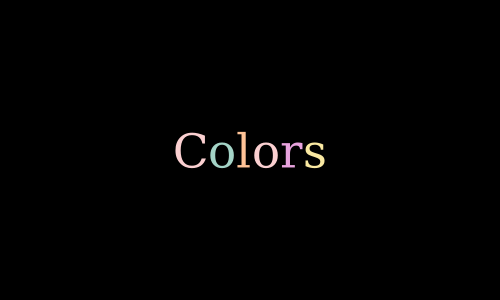

In [18]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        text = Text("Colors", font_size=96)
        for letter in text:
            letter.set_color(random_bright_color())
        self.add(text)

>Please note that Ligature can cause problems here. If you need a one-to-one mapping of characters to submobjects you should pass the `disable_ligatures` parameter to `Text`.

### MarkupText

`MarkupText` is similar to `Text`, the only difference between them is that this accepts and processes PangoMarkup (which is similar to html), instead of just rendering plain text.

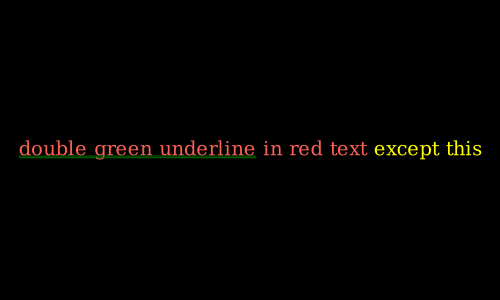

In [21]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        text = MarkupText(
            f'<span underline="double" underline_color="green">double green underline</span> in red text<span fgcolor="{YELLOW}"> except this</span>',
            color=RED,
            font_size=40
        )
        self.add(text)

### `Paragraph`

For a given `Paragraph`, `par`, the attribute `par.chars` is a `VGroup` containing all the lines. In this context, every line is constructed as a `VGroup` of characters contained in the line.

In [22]:
paragraph = Paragraph('this is a awesome', 'paragraph',
                      'With \nNewlines', '\tWith Tabs',
                      '  With Spaces', 'With Alignments',
                      'center', 'left', 'right')

In [24]:
paragraph.chars

VGroup(VGroup of 14 submobjects, VGroup of 9 submobjects, VGroup of 4 submobjects, VGroup of 8 submobjects, VGroup of 8 submobjects, VGroup of 10 submobjects, VGroup of 14 submobjects, VGroup of 6 submobjects, VGroup of 4 submobjects, VGroup of 5 submobjects)

In [25]:
paragraph.chars[0]

VGroup(VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath, VMobjectFromSVGPath)

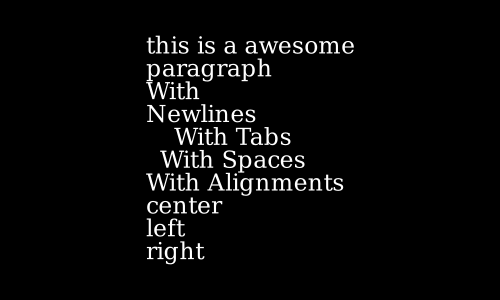

In [26]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        paragraph = Paragraph('this is a awesome', 'paragraph',
                                'With \nNewlines', '\tWith Tabs',
                                '  With Spaces', 'With Alignments', 
                                'center', 'left', 'right')
        self.add(paragraph)

### The `Write` animation

Manim has a number of different animations for writing text. The simplest of them is `Write`. It writes the text letter by letter.

In [32]:
%%manim $param

class Example(Scene):
    def construct(self):
        morning = Text("Hello World!", font="sans-serif", font_size=96)
        self.play(Write(morning))
        self.wait(2)

## LaTeX

LaTeX can be used in almost the same way as text by using the `Tex` class instead of `Text`.

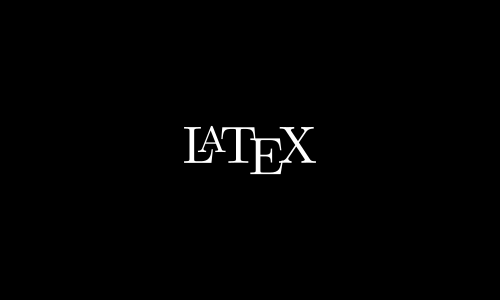

In [33]:
%%manim $param

class Example(Scene):
    def construct(self):
        tex = Tex(r"\LaTeX", font_size=144)
        self.add(tex)

### `MathTex`

Everything passed to `MathTex` is in math mode by default. To be more precise, `MathTex` is processed within an `align*` environment. You can achieve a similar effect with `Tex` by enclosing your formula with `$` symbols: `$\xrightarrow{x^6y^8}$`:


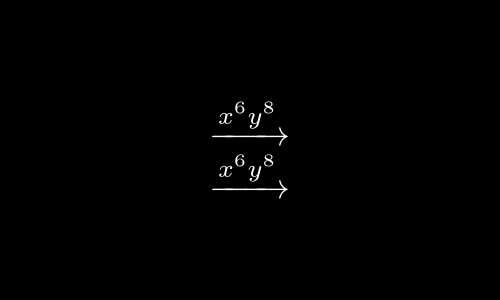

In [34]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        rtarrow0 = MathTex(r"\xrightarrow{x^6y^8}", font_size=96)
        rtarrow1 = Tex(r"$\xrightarrow{x^6y^8}$", font_size=96)

        self.add(VGroup(rtarrow0, rtarrow1).arrange(DOWN))

#### Keywords Arguments

We can use any standard `LaTeX` commands in the AMS maths packages. Such as the `mathtt` math-text type or the `looparrowright` arrow:

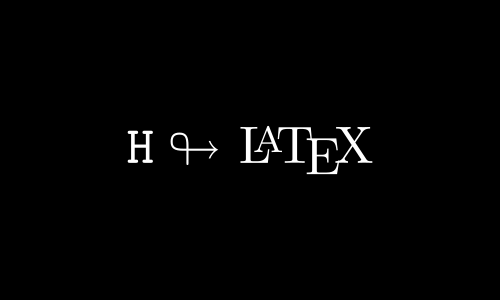

In [35]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        tex = Tex(r'$\mathtt{H} \looparrowright$ \LaTeX', font_size=144)
        self.add(tex)
        

As for changing the appearance, you can use keywords very similar to the ones used in `Text`:

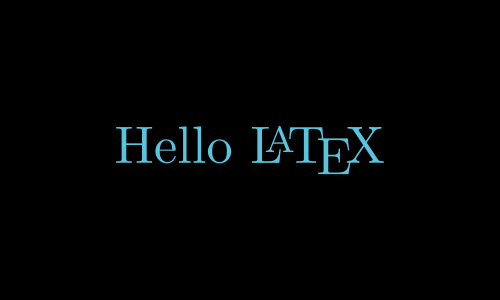

In [36]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        tex = Tex(r'Hello \LaTeX', color=BLUE, font_size=144)
        self.add(tex)

### Extra LaTeX Packages

Some commands require special packages to be loaded into the TeX template. For example, to use the `mathscr` script, we need to add the `mathrsfs` package. Since this package isn’t loaded into Manim’s tex template by default, we have to add it manually.

This addition is straightforward: we just have to create a tex template and use `add_to_preamble` to add the package. We can then pass this template to the `Tex` or `MathTex` mobject using the `tex_template` keyword argument.

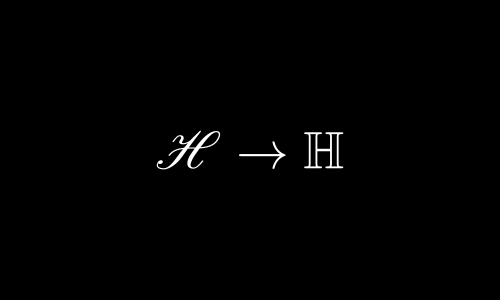

In [37]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        myTemplate = TexTemplate()
        myTemplate.add_to_preamble(r"\usepackage{mathrsfs}")
        tex = Tex(
            r"$\mathscr{H} \rightarrow \mathbb{H}$}",
            tex_template=myTemplate,
            font_size=144,
        )
        self.add(tex)

### Substrings and parts

The TeX mobject can accept multiple strings as arguments. Afterwards you can refer to the individual parts either by their index (like `tex[1]`), or by selecting parts of the tex code. In this example, we set the color of the `\bigstar` using `set_color_by_tex()`:

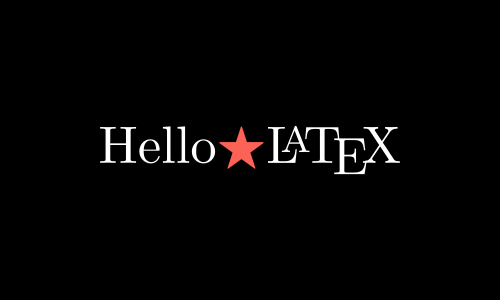

In [38]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        tex = Tex('Hello', r'$\bigstar$', r'\LaTeX', font_size=144)
        tex.set_color_by_tex('igsta', RED)
        self.add(tex)

Note that `set_color_by_tex()` colors the entire substring containing the Tex, not just the specific symbol or Tex expression. Consider the following example:

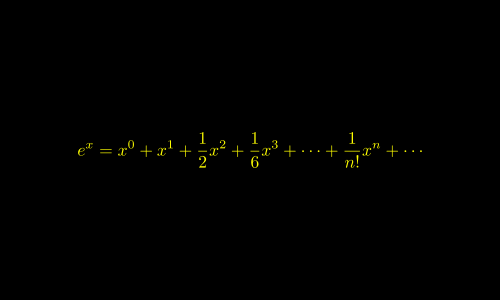

In [39]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        equation = MathTex(
            r"e^x = x^0 + x^1 + \frac{1}{2} x^2 + \frac{1}{6} x^3 + \cdots + \frac{1}{n!} x^n + \cdots"
        )
        equation.set_color_by_tex("x", YELLOW)
        self.add(equation)

As you can see, this colors the entire equation yellow, contrary to what may be expected. To color only `x` yellow, we have to do the following:

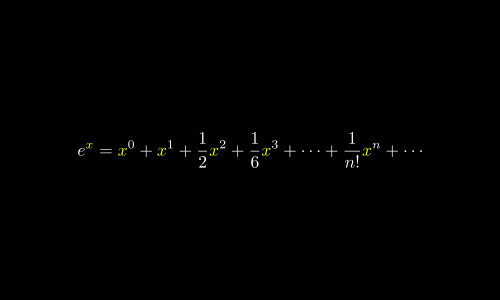

In [40]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        equation = MathTex(
            r"e^x = x^0 + x^1 + \frac{1}{2} x^2 + \frac{1}{6} x^3 + \cdots + \frac{1}{n!} x^n + \cdots",
            substrings_to_isolate="x"
        )
        equation.set_color_by_tex("x", YELLOW)
        self.add(equation)

By setting `substrings_to_isolate` to `x`, we split up the `MathTex` into substrings automatically and isolate the `x` components into individual substrings.

Note that Manim also supports a custom syntax that allows splitting a TeX string into substrings easily: simply enclose parts of your formula that you want to isolate with double braces. In the string `MathTex(r"{{ a^2 }} + {{ b^2 }} = {{ c^2 }}")`, the rendered mobject will consist of the substrings `a^2`, +, `b^2`, `=`, and `c^2`.

#### Using `index_labels`

You might sometimes be working with a very complicated `MathTex` mobject that makes it difficult to work with its individual components. This is where the debugging function `index_labels()` is very useful.

The method shows the index of a mobject’s submobjects, allowing you to easily find the components of the mobject you would like to change.

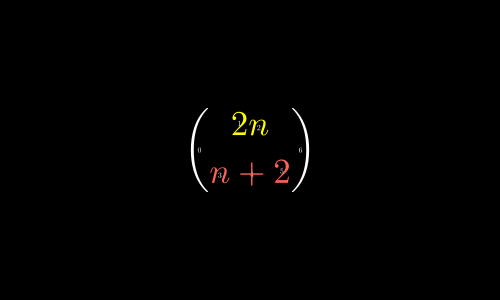

In [41]:
%%manim $param_fig

class Example(Scene):
    def construct(self):
        text = MathTex(r"\binom{2n}{n+2}", font_size=96)

        # index the first (and only) term of the MathTex mob
        self.add(index_labels(text[0]))

        text[0][1:3].set_color(YELLOW)
        text[0][3:6].set_color(RED)
        self.add(text)

> Note that `MathTex` mobject is typeset in the LaTeX `align*` environment. This means you can use the `&` alignment character when typesetting multiline formulae.